# Exploratory Data Analysis (EDA)

## The goal

- Understand the data.
- Make sure that the data I have is sufficient for the task.
- Answer important questions and extract insights.
- EDA is not a one-time thing; as the data grows, we should check it again for shifts or anomalies.

In [1]:
import os
import pandas as pd
from collections import Counter
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
sns.set_theme()
warnings.filterwarnings("ignore")

In [2]:
os.chdir("..")

In [3]:
data_dir = os.path.join("data")
raw_dir = os.path.join(data_dir, "raw")
processed_dir = os.path.join(data_dir, "processed")

## Load & Prepare Data

In [4]:
data = pd.read_csv(os.path.join(raw_dir, "tweet_topic_multi.csv"), index_col=False)

In [5]:
data.head()

,text,date,label,label_name,id
0,Game day for {{USERNAME}} U18’s against {{USER...,2019-09-08,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",['sports'],1170606779568463874
1,⚽️ This afternoon we have our first League gam...,2019-09-08,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",['sports'],1170607436924952576
2,Might watch the {@Tennessee Titans@} game only...,2019-09-08,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",['sports'],1170666727845376000
3,. {@Asante Kotoko SC@} should have moved for t...,2019-09-08,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ...","['fitness_&_health', 'news_&_social_concern', ...",1170728379290673154
4,Massive WELL DONE to BSLFC Reserves today in t...,2019-09-08,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",['sports'],1170788768690970624


In [6]:
data.dtypes

text          object
date          object
label         object
label_name    object
id             int64
dtype: object

# Label distribution

In [7]:
# iterate over each label in every record for all the records
labels = [item for record in data["label_name"].tolist() for item in eval(record)]
labels[:5]

['sports', 'sports', 'sports', 'fitness_&_health', 'news_&_social_concern']

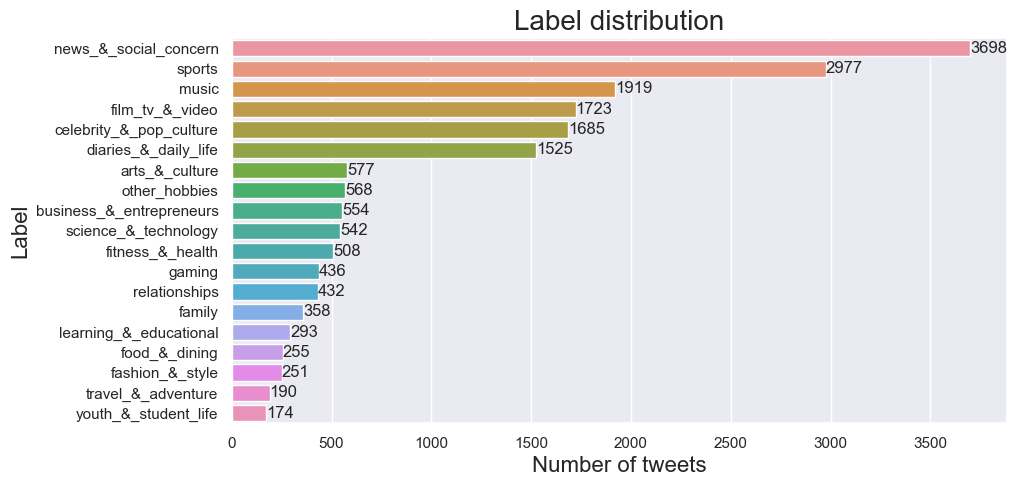

In [8]:
unique_labels, label_counts = zip(*Counter(labels).most_common())
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list(label_counts), y=list(unique_labels), orient="h")
plt.title("Label distribution", fontsize=20)
plt.ylabel("Label", fontsize=16)
# ax.set_xticklabels(unique_labels, rotation=90, fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel("Number of tweets", fontsize=16)
plt.show()

In [9]:
data["label_name"][0]

"['sports']"

# Wordcloud

In [10]:
def check(labels: str, target_label: str):
    return target_label in eval(labels)

In [11]:
# Most frequent tokens for each tag
@widgets.interact(target=list(unique_labels))
def display_word_cloud(target="sports"):
    # Plot word clouds top top tags
    plt.figure(figsize=(15, 5))
    subset = data[data["label_name"].apply(lambda l: check(l, target))]
    text = subset.text.values
    cloud = WordCloud(
        stopwords=STOPWORDS, background_color="black", collocations=False,
        width=500, height=300).generate(" ".join(text))
    plt.axis("off")
    plt.imshow(cloud)

interactive(children=(Dropdown(description='target', index=1, options=('news_&_social_concern', 'sports', 'mus…